In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow 

In [82]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [83]:
df=pd.read_csv('Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [84]:
df.drop(columns=['Serial No.'],inplace=True)


In [85]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [86]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [87]:
X=df.iloc[:,0:7]
y=df.iloc[:,-1]

In [88]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [90]:
scaler=MinMaxScaler()

In [91]:
X_train_trans=scaler.fit_transform(X_train)
X_test_trans=scaler.transform(X_test)

In [92]:
model=Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='linear'))

d:\PYTHON\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [93]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [94]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84 (336.00 B)

 Trainable params: 84 (336.00 B)

 Non-trainable params: 0 (0.00 B)

In [99]:
history=model.fit(X_train_trans,y_train,epochs=150,validation_split=0.2)

Epoch 1/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0084 - val_loss: 0.0054
Epoch 2/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0074 - val_loss: 0.0053
Epoch 3/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0077 - val_loss: 0.0053
Epoch 4/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075 - val_loss: 0.0052
Epoch 5/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0079 - val_loss: 0.0052
Epoch 6/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0081 - val_loss: 0.0051
Epoch 7/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0072 - val_loss: 0.0051
Epoch 8/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0067 - val_loss: 0.0051
Epoch 9/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068 - val_loss: 0.0050
Epoch 10/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0068 - val_loss: 0.0050
Epoch 11/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 - val_loss: 0.0049
Epoch 12/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.

In [100]:
y_pred=model.predict(X_test_trans)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step


In [101]:
from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred))

0.7888237236023697


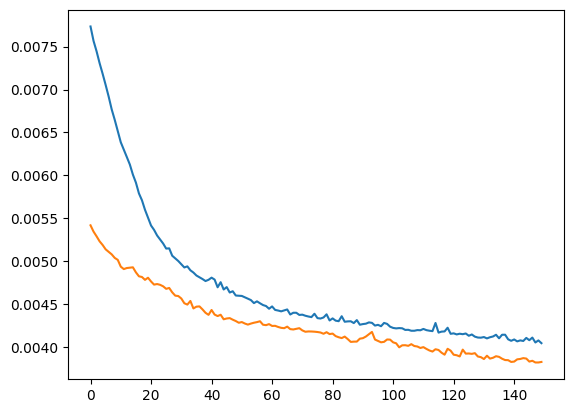

In [102]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])